In [23]:
import requests
import json
import pandas as pd

url = 'https://dw.euro.who.int/api/v3/measures/UHCFP_2?output=data,attributes'

headers = {
    "Accept": "application/json",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)",
}

response = requests.get(url, headers=headers).text
 
data_dict = json.loads(response)


#print(pd.Series(data_dict))

data = data_dict['data']

#print(data)


df_impoverished = pd.DataFrame()
dict_cleaned = dict()
#percentage of impoverished households after out of pocket healthcare payments 
for diction in data:
    dict_cleaned['country'] = diction['dimensions']['COUNTRY']
    dict_cleaned['year'] = diction['dimensions']['YEAR']
    dict_cleaned['impoverished'] = diction['value']['numeric']
    cleaned_series = pd.Series(dict_cleaned)
    df_impoverished = pd.concat([df_impoverished, cleaned_series.to_frame().T], ignore_index=True)

pd.set_option('display.max_rows', None)

df_impoverished.head(8)


,country,year,impoverished
0,AUT,2005,0.17
1,AUT,2010,0.12
2,AUT,2015,0.2
3,BEL,2012,0.58
4,BEL,2014,0.32
5,BEL,2016,0.41
6,BEL,2018,0.22
7,BEL,2020,0.4


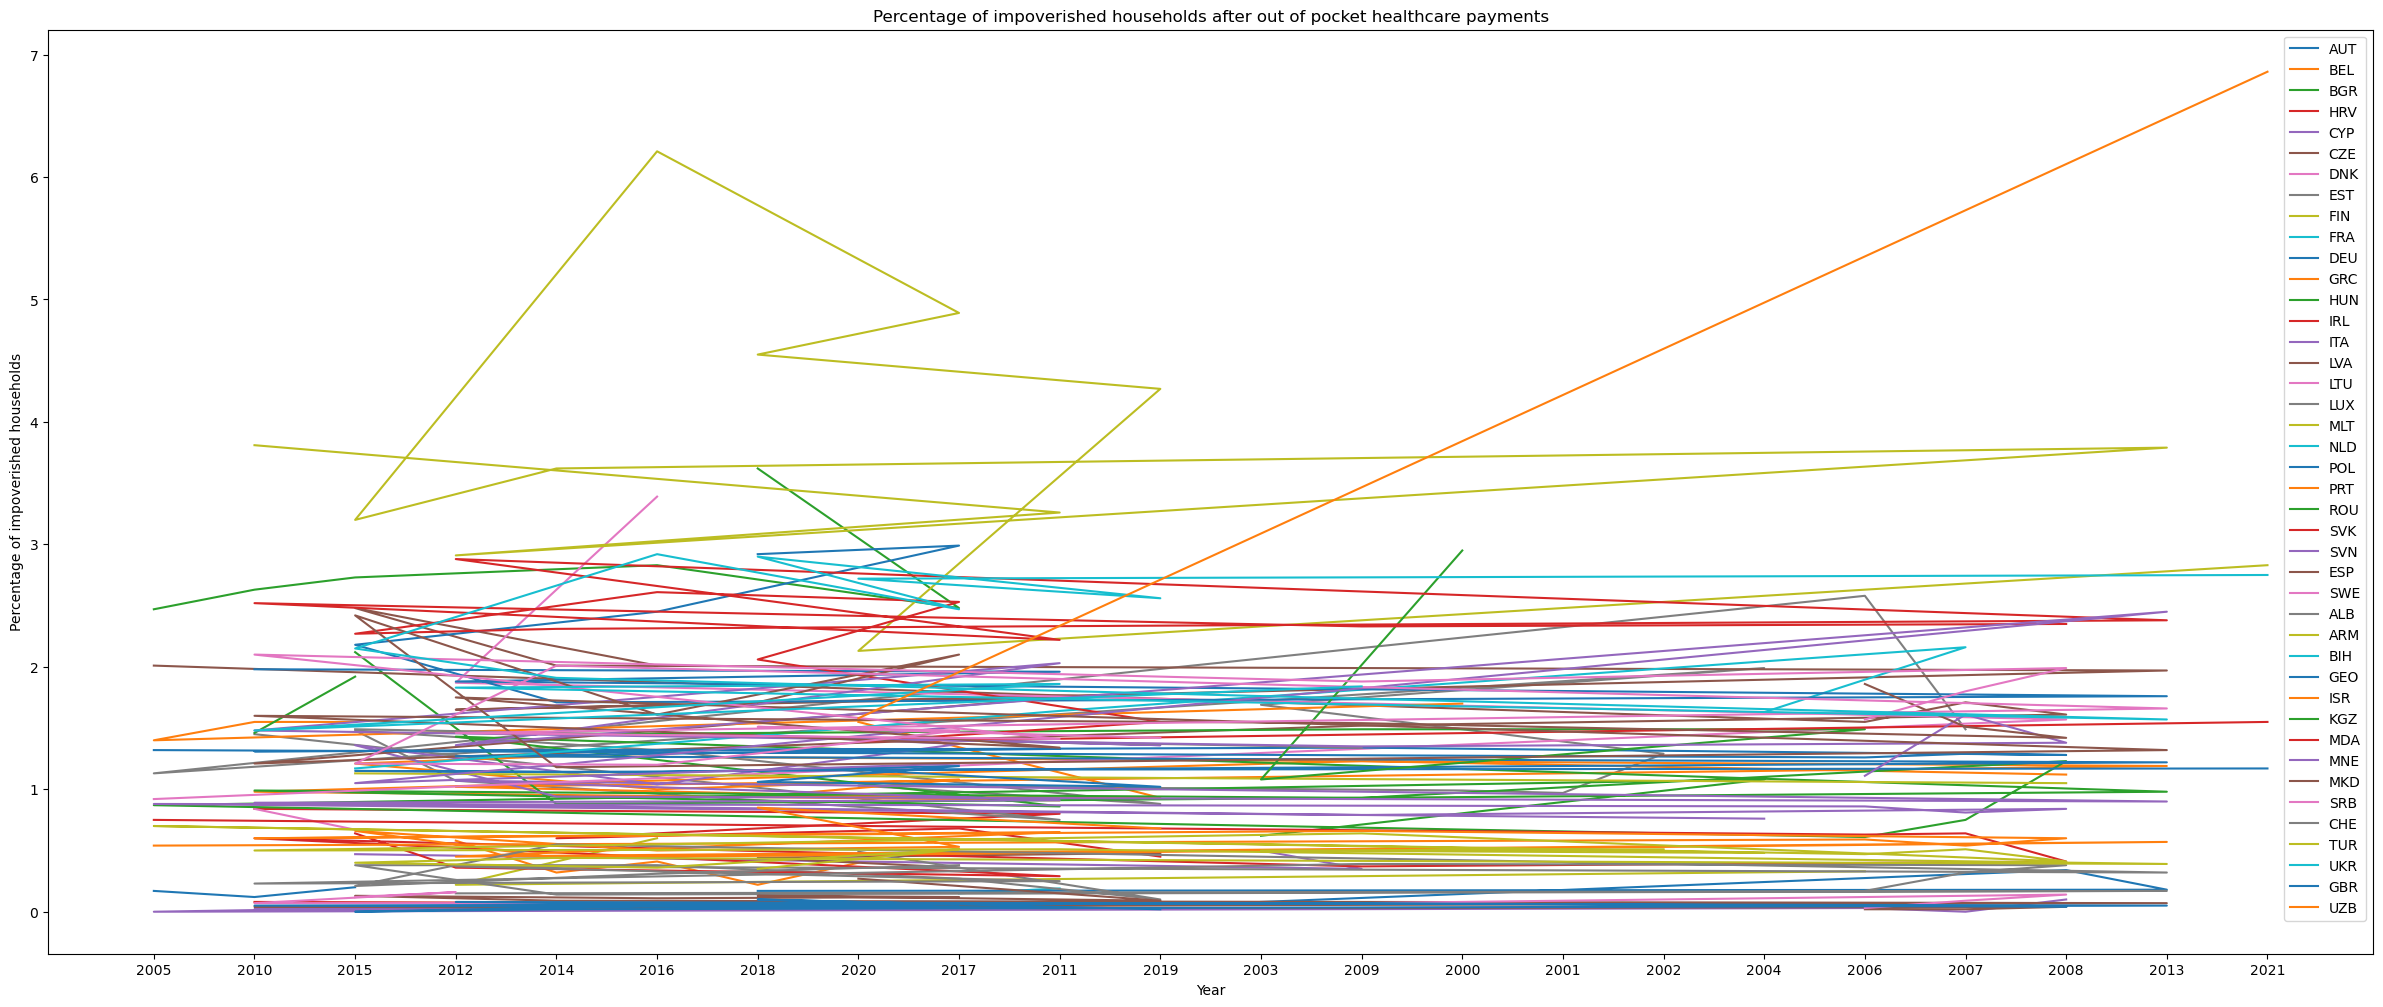

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 12))
seen_country = []
for item in df_impoverished['country']:
    if item not in seen_country:
        subset = df_impoverished[(df_impoverished['country'] == item)].copy()
        plt.plot(subset['year'], subset['impoverished'], label=item)
        seen_country.append(item)
plt.xlabel('Year')
plt.ylabel('Percentage of impoverished households')
plt.title('Percentage of impoverished households after out of pocket healthcare payments')
plt.legend()
plt.show()

In [15]:
url = f'https://dw.euro.who.int/api/v3/measures/H2020_17?output=data'

url_text = requests.get(url, headers=headers).text

result = json.loads(url_text)
#print(result2)

data = result['data']

#print(data)
df_life_expec = pd.DataFrame()
final_dict = dict()

for item in data:
    
    final_dict['country'] = item['dimensions']['COUNTRY']
    #final_dict['country_grp'] = item['dimensions']['COUNTRY_GRP']
    final_dict['year'] = item['dimensions']['YEAR']
    final_dict['life_expectancy'] = item['value']['numeric']
    series = pd.Series(final_dict)
    df_life_expec = pd.concat([df_life_expec, series.to_frame().T], ignore_index = True)
    df_life_expec = df_life_expec.sort_values('year', ascending=True)
    
    

#print(series)
#pd.set_option('display.max_rows', None)
df_life_expec.head()


#life expectancy in years 

,country,year,life_expectancy
0,DNK,1970,73.51
31,UZB,1970,72.85
30,CHE,1970,73.24
29,,1970,71.81
28,KGZ,1970,67.88


In [16]:
import plotly.express as px
#df_total2 = df_total.iloc[4191:]
figure = px.scatter(x=df_life_expec['year'], y=df_life_expec['life_expectancy'], color=df_life_expec['country'], labels={
                     "x": "Years",
                     "y": "Life Expectancy (Years)"
                 },title = 'Country Life Expectancy over time')
figure.show()

In [17]:
url = f'https://dw.euro.who.int/api/v3/measures/H2020_19?output=data'

url_text = requests.get(url, headers=headers).text

result = json.loads(url_text)
#print(result2)

data = result['data']

#print(data)
df_mortality = pd.DataFrame()
final_dict = dict()

for item in data:
    
    final_dict['country'] = item['dimensions']['COUNTRY']
    #final_dict['country_grp'] = item['dimensions']['COUNTRY_GRP']
    final_dict['year'] = item['dimensions']['YEAR']
    final_dict['infant_mortality'] = item['value']['numeric']
    series = pd.Series(final_dict)
    df_mortality = pd.concat([df_mortality, series.to_frame().T], ignore_index = True)
    df_mortality = df_mortality.sort_values('year', ascending=True)
    
    

#print(series)
#pd.set_option('display.max_rows', None)
df_mortality.head()


#infant mortality rates  

,country,year,infant_mortality
0,ESP,1970,75.51
31,ISR,1970,73.39
30,BGR,1970,73.54
29,UZB,1970,76.0
28,ROU,1970,70.33


In [18]:
import plotly.express as px
#df_total2 = df_total.iloc[4191:]
figure = px.scatter(x=df_mortality['year'], y=df_mortality['infant_mortality'], color=df_mortality['country'], labels={
                     "x": "Years",
                     "y": "Infant Mortality Rates"
                 },title = 'Infant Mortality Rates over time')
figure.show()

In [19]:
url = f'https://dw.euro.who.int/api/v3/measures/HFA_609?output=data'

url_text = requests.get(url, headers=headers).text

result = json.loads(url_text)
#print(result2)

data = result['data']

#print(data)
df_vaccinations = pd.DataFrame()
final_dict = dict()

for item in data:
    
    final_dict['country'] = item['dimensions']['COUNTRY']
    #final_dict['country_grp'] = item['dimensions']['COUNTRY_GRP']
    final_dict['year'] = item['dimensions']['YEAR']
    final_dict['measles_vaccinations'] = item['value']['numeric']
    series = pd.Series(final_dict)
    df_vaccinations = pd.concat([df_vaccinations, series.to_frame().T], ignore_index = True)
    df_vaccinations = df_vaccinations.sort_values('year', ascending=True)
    
    

#print(series)
#pd.set_option('display.max_rows', None)
df_vaccinations.head()

#% of children vaccinated against measles 

,country,year,measles_vaccinations
0,ALB,1980,90.0
15,SVN,1980,85.0
13,MDA,1980,94.0
12,ISR,1980,81.0
11,NLD,1980,91.0


In [20]:
import plotly.express as px
#df_total2 = df_total.iloc[4191:]
figure = px.scatter(x=df_vaccinations['year'], y=df_vaccinations['measles_vaccinations'], color=df_vaccinations['country'], labels={
                     "x": "Years",
                     "y": "Measles vaccinations (%)"
                 },title = 'Percentage of children vaccinated against measles')
figure.show()

In [21]:
url = f'https://dw.euro.who.int/api/v3/measures/CAH_22?output=data'

url_text = requests.get(url, headers=headers).text

result = json.loads(url_text)
#print(result2)

data = result['data']

#print(data)
df_overweight = pd.DataFrame()
final_dict = dict()

for item in data:
    
    final_dict['country'] = item['dimensions']['COUNTRY']
    #final_dict['country_grp'] = item['dimensions']['COUNTRY_GRP']
    final_dict['year'] = item['dimensions']['YEAR']
    final_dict['overweight_obese_children'] = item['value']['numeric']
    series = pd.Series(final_dict)
    df_overweight = pd.concat([df_overweight, series.to_frame().T], ignore_index = True)
    df_overweight = df_overweight.sort_values('year', ascending=True)
    
    

#print(series)
#pd.set_option('display.max_rows', None)
df_overweight.head()

#Percentage of overweight/obese children 

,country,year,overweight_obese_children
0,AUT,2002,15.0
63,NLD,2002,5.0
62,GBR,2002,18.0
61,ITA,2002,12.0
60,AUT,2002,13.0


In [22]:
import plotly.express as px
#df_total2 = df_total.iloc[4191:]
figure = px.scatter(x=df_overweight['year'], y=df_overweight['overweight_obese_children'], color=df_overweight['country'], labels={
                     "x": "Years",
                     "y": "Overweight/Obese Children (%)"
                 },title = 'Percentage of children that are overweight or obese')
figure.show()